### Useful links:

Activity codes lexicons: http://www.bls.gov/tus/lexiconnoex2013.pdf

Frequently used variables: http://www.bls.gov/tus/freqvariables.pdf

In [15]:
import pandas as pd
import re
import seaborn
%matplotlib inline

atus_data = pd.read_csv("~/travis_python/homework/atus-analysis/atusdata/atussum_2013.dat")

### Renaming and categorizing data

In [16]:
atus_data.rename(columns={'TRYHHCHILD':'Youngest_child', 'TEAGE':'Age', 'TESEX':'Sex', 'PEEDUCA':'Education', 'PTDTRACE':'Race', 'GTMETSTA':'Metro_status', 'TELFS':'Labor_status', 'TRERNWA':'Wkly_earnings'}, inplace=True)
atus_data.head()

,tucaseid,TUFINLWGT,Youngest_child,Age,Sex,Education,Race,PEHSPNON,Metro_status,Labor_status,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
columns = atus_data.columns.values
sleep = []
for heading in columns:
    if "t0101" in heading:
        sleep.append(atus_data[heading])
non_sleep_personal = []
for heading in columns:
    if ("t01" in heading) and not ("t0101" in heading):
        non_sleep_personal.append(atus_data[heading])
HH_activities = []
for heading in columns:
    if "t02" in heading:
        HH_activities.append(atus_data[heading])
HH_help = []
for heading in columns:
    if "t03" in heading:
        HH_help.append(atus_data[heading])
non_HH_help = []
for heading in columns:
    if "t04" in heading:
        non_HH_help.append(atus_data[heading])
Work = []
for heading in columns:
    if "t05" in heading:
        Work.append(atus_data[heading])
Education = []
for heading in columns:
    if "t06" in heading:
        Education.append(atus_data[heading])
Purchases = []
for heading in columns:
    if "t07" in heading:
        Purchases.append(atus_data[heading])
Services = []
for heading in columns:
    if "t08" in heading:
        Services.append(atus_data[heading])
HH_Services = []
for heading in columns:
    if "t09" in heading:
        HH_Services.append(atus_data[heading])
Gov_Civic = []
for heading in columns:
    if "t10" in heading:
        Gov_Civic.append(atus_data[heading]) 
Eat_Drink = []
for heading in columns:
    if "t11" in heading:
        Eat_Drink.append(atus_data[heading])
Social_leisure = []
for heading in columns:
    if "t12" in heading:
        Social_leisure.append(atus_data[heading])
Sports = []
for heading in columns:
    if "t13" in heading:
        Sports.append(atus_data[heading])
Religion = []
for heading in columns:
    if "t14" in heading:
        Religion.append(atus_data[heading])
Volunteer = []
for heading in columns:
    if "t15" in heading:
        Volunteer.append(atus_data[heading])
Phone = []
for heading in columns:
    if "t16" in heading:
        Phone.append(atus_data[heading])
Travel = []
for heading in columns:
    if "t18" in heading:
        Travel.append(atus_data[heading])

In [18]:
atus_data["Sleep"] = sum(sleep)
atus_data["Non_Sleep_Personal"] = sum(non_sleep_personal)
atus_data["HH_activities"] = sum(HH_activities)
atus_data["HH_help"] = sum(HH_help)
atus_data["non_HH_help"] = sum(non_HH_help)
atus_data["Work"] = sum(Work)
atus_data["Education"] = sum(Education)
atus_data["Purchases"] = sum(Purchases)
atus_data["Services"] = sum(Services)
atus_data["HH_Services"] = sum(HH_Services)
atus_data["Gov_Civic"] = sum(Gov_Civic)
atus_data["Eat_Drink"] = sum(Eat_Drink)
atus_data["Social_leisure"] = sum(Social_leisure)
atus_data["Sports"] = sum(Sports)
atus_data["Religion"] = sum(Religion)
atus_data["Volunteer"] = sum(Volunteer)
atus_data["Phone"] = sum(Phone)
atus_data["Travel"] = sum(Travel)
atus_data.head()

,tucaseid,TUFINLWGT,Youngest_child,Age,Sex,Education,Race,PEHSPNON,Metro_status,Labor_status,...,Services,HH_Services,Gov_Civic,Eat_Drink,Social_leisure,Sports,Religion,Volunteer,Phone,Travel
0,20130101130004,11899905.662034,12,22,2,455,8,2,1,5,...,0,0,0,35,330,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,0,1,2,1,1,...,0,0,0,75,160,0,0,0,0,20
2,20130101130123,10377056.507734,-1,47,2,0,1,2,1,4,...,0,0,0,170,80,260,0,0,0,65
3,20130101130611,7731257.992805,-1,50,2,0,1,1,1,1,...,0,0,0,70,125,0,0,0,0,75
4,20130101130616,4725269.227067,-1,45,2,510,2,2,1,1,...,0,0,0,120,90,60,0,0,0,0


In [19]:
cat_data = atus_data[["tucaseid", "TUFINLWGT", "Youngest_child", "Age", "Sex", "Education", "Labor_status", "Wkly_earnings", "Sleep", "Non_Sleep_Personal", "HH_activities", "HH_help", "non_HH_help", "Work", "Education", "Purchases", "Services", "HH_Services", "Gov_Civic", "Eat_Drink", "Social_leisure", "Sports", "Religion", "Volunteer", "Phone", "Travel"]]

In [134]:
telfs = pd.Series({1: "Employed - at work",
                   2: "Employed - absent",
                   3: "Unemployed - laid off",
                   4: "Unemployed - looking",
                   5: "Not in labor force"})

In [21]:
women = cat_data.groupby(['Sex']).get_group((2))
men = cat_data.groupby(['Sex']).get_group((1))
#print(women.head())

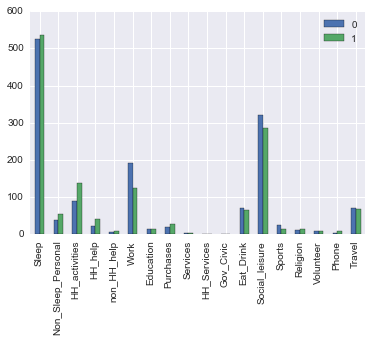

In [22]:
menave = pd.Series(men.mean(axis=0))
womenave = pd.Series(women.mean(axis=0))

sexave = pd.concat([menave, womenave], axis=1, ignore_index=True)[8:]
sexave.plot(kind="bar")

## Roster File

In [103]:
atus_resp = pd.read_csv("~/travis_python/homework/atus-analysis/atusdata/atusresp_2013.dat")
atus_resp.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [104]:
atus_resp.rename(columns={'TRSPPRES': "domestic_partner", "TRHHCHILD": "children", "TEHRUSLT": "work_hours"}, inplace=True)


In [105]:
dom_partner = pd.Series({1: "Spouse",
                   2: "Unmarried Partner",
                   3: "Single"})
atus_resp.domestic_partner = atus_resp.domestic_partner.map(dom_partner)

kids = pd.Series({1: "Children", 2: "No Children"})
atus_resp.children = atus_resp.children.map(kids)


In [106]:
short_resp = atus_resp[['TUCASEID', 'domestic_partner', 'children', 'work_hours']]

In [107]:
short_resp.head()

,TUCASEID,domestic_partner,children,work_hours
0,20130101130004,Single,Children,-1
1,20130101130112,Spouse,Children,40
2,20130101130123,Spouse,No Children,-1
3,20130101130611,Single,No Children,-4
4,20130101130616,Single,No Children,21


For work_hours, "-4" means "hours vary"

In [153]:
df = pd.merge(cat_data, short_resp, how="outer", left_on="tucaseid", right_on="TUCASEID")

In [154]:
df.columns.values

array(['tucaseid', 'TUFINLWGT', 'Youngest_child', 'Age', 'Sex',
       'Education', 'Labor_status', 'Wkly_earnings', 'Sleep',
       'Non_Sleep_Personal', 'HH_activities', 'HH_help', 'non_HH_help',
       'Work', 'Education', 'Purchases', 'Services', 'HH_Services',
       'Gov_Civic', 'Eat_Drink', 'Social_leisure', 'Sports', 'Religion',
       'Volunteer', 'Phone', 'Travel', 'TUCASEID', 'domestic_partner',
       'children', 'work_hours'], dtype=object)

In [171]:
df = df[['tucaseid', 'TUFINLWGT', 'Age', 'Sex', 'domestic_partner', 'children', 
         'Labor_status', 'Wkly_earnings', 'work_hours', 'Sleep', 'Non_Sleep_Personal', 
         'HH_activities', 'Work', 'Social_leisure', 'Travel']]
df.head()

,tucaseid,TUFINLWGT,Age,Sex,domestic_partner,children,Labor_status,Wkly_earnings,work_hours,Sleep,Non_Sleep_Personal,HH_activities,Work,Social_leisure,Travel
0,20130101130004,11899905.662034,22,2,Single,Children,5,-1,-1,540,20,0,0,330,0
1,20130101130112,4447638.009513,39,1,Spouse,Children,1,173076,40,580,35,111,0,160,20
2,20130101130123,10377056.507734,47,2,Spouse,No Children,4,-1,-1,450,90,295,0,80,65
3,20130101130611,7731257.992805,50,2,Single,No Children,1,86538,-4,450,30,0,680,125,75
4,20130101130616,4725269.227067,45,2,Single,No Children,1,23000,21,570,0,90,0,90,0


In [151]:
"""df.Labor_status = df.Labor_status.map(telfs)"""

In [131]:
"""def group_ages(age):
    if 18 <= age <= 29:
        return "age 18-29"
    elif 30 <= age <= 45:
        return "age 30-45"
    elif 46 <= age <= 60:
        return "age 46-60"
    elif 61 <= age:
        return "age 61+  "
                """

In [132]:
df.Age = df.Age.apply(group_ages)

In [165]:
df.head()

,tucaseid,TUFINLWGT,Age,Sex,domestic_partner,children,Labor_status,Wkly_earnings,work_hours,Sleep,Non_Sleep_Personal,HH_activities,Work,Purchases,Services,HH_Services,Social_leisure,Phone,Travel
0,20130101130004,11899905.662034,22,2,Single,Children,5,-1,-1,540,20,0,0,0,0,0,330,0,0
1,20130101130112,4447638.009513,39,1,Spouse,Children,1,173076,40,580,35,111,0,70,0,0,160,0,20
2,20130101130123,10377056.507734,47,2,Spouse,No Children,4,-1,-1,450,90,295,0,15,0,0,80,0,65
3,20130101130611,7731257.992805,50,2,Single,No Children,1,86538,-4,450,30,0,680,10,0,0,125,0,75
4,20130101130616,4725269.227067,45,2,Single,No Children,1,23000,21,570,0,90,0,0,0,0,90,0,0


In [148]:
sex = pd.Series({1: "male", 2: "female"})

In [149]:
sexes = pd.Series({1: "Male", 2: "Female"})
df.Sex = df.Sex.map(sexes)

In [162]:
df.describe()

,tucaseid,TUFINLWGT,Age,Sex,Labor_status,Wkly_earnings,work_hours,Sleep,Non_Sleep_Personal,HH_activities,Work,Purchases,Services,HH_Services,Social_leisure,Phone,Travel
count,1.138500e+04,1.138500e+04,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000
mean,2.013064e+13,8.008868e+06,48.279842,1.553623,2.571805,49534.988669,21.985683,531.140799,47.744313,116.879139,155.032587,24.464207,4.335968,0.764603,301.972596,6.351252,69.373562
std,3.517214e+08,7.185242e+06,17.909707,0.497138,1.891551,68103.111687,22.663148,135.308386,61.311278,137.327289,238.046772,49.669864,23.819972,8.767599,216.482582,23.612956,76.710103
min,2.013010e+13,6.881577e+05,15.000000,1.000000,1.000000,-1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.013030e+13,3.409968e+06,34.000000,1.000000,1.000000,-1.000000,-1.000000,450.000000,15.000000,10.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,20.000000
50%,2.013061e+13,5.943161e+06,48.000000,2.000000,1.000000,16000.000000,24.000000,525.000000,36.000000,65.000000,0.000000,0.000000,0.000000,0.000000,260.000000,0.000000,50.000000
75%,2.013091e+13,9.897958e+06,62.000000,2.000000,5.000000,80000.000000,40.000000,600.000000,60.000000,180.000000,375.000000,30.000000,0.000000,0.000000,435.000000,0.000000,95.000000
max,2.013121e+13,1.125620e+08,85.000000,2.000000,5.000000,288461.000000,120.000000,1413.000000,1105.000000,1365.000000,1350.000000,1055.000000,539.000000,360.000000,1439.000000,460.000000,1088.000000


In [175]:
women = df.Sex == 2
men = df.Sex == 1
working_age = df.Age < 55
children = df.children == "Children"
no_children = df.children == "No Children"
not_in_labor_force = df.Labor_status == 5
employed = df.Labor_status < 3
single = df.domestic_partner == "Single"
coupled = df.domestic_partner != "Single"
full_time = df.work_hours >= 30
part_time = df.work_hours < 30

In [176]:
def average_minutes(data, activity_code):
    activity_col = "{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [183]:
wa_men = df[men & working_age]
wa_women = df[women & working_age]
wa_men = df[men & working_age]
men_children = df[men & working_age & children]
men_no_child = df[men & working_age & no_children]
women_children = df[women & working_age & children]
women_no_child = df[women & working_age & no_children]
men_single = df[men & working_age & single]
men_couple = df[men & working_age & coupled]
women_single = df[women & working_age & single]
women_couple = df[women & working_age & coupled]
men_single_children = df[men & working_age & children & single]
men_single_no_child = df[men & working_age & no_children & single]
men_couple_children = df[men & working_age & children & coupled]
men_couple_no_child = df[men & working_age & no_children & coupled]
women_single_children = df[women & working_age & children & single]
women_single_no_child = df[women & working_age & no_children & single]
women_couple_children = df[women & working_age & children & coupled]
women_couple_no_child = df[women & working_age & no_children & coupled]





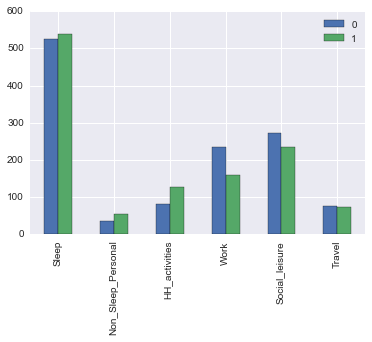

In [187]:
menave = pd.Series(wa_men.mean(axis=0))
womenave = pd.Series(wa_women.mean(axis=0))

sexave = pd.concat([menave, womenave], axis=1, ignore_index=True)[7:]
sexave.plot(kind="bar")

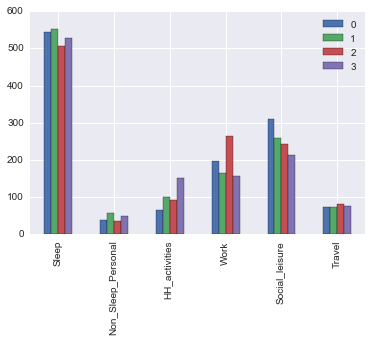

In [188]:
men_single_ave = pd.Series(men_single.mean(axis=0))
men_couple_ave = pd.Series(men_couple.mean(axis=0))
women_single_ave = pd.Series(women_single.mean(axis=0))
women_couple_ave = pd.Series(women_couple.mean(axis=0))

coupled_ave = pd.concat([men_single_ave, women_single_ave, men_couple_ave, women_couple_ave], axis=1, ignore_index=True)[7:]
coupled_ave.plot(kind="bar")

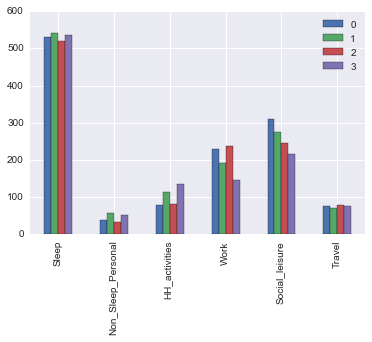

In [189]:
men_children = pd.Series(men_children.mean(axis=0))
men_no_child = pd.Series(men_no_child.mean(axis=0))
women_children = pd.Series(women_children.mean(axis=0))
women_no_child = pd.Series(women_no_child.mean(axis=0))

children_ave = pd.concat([men_no_child, women_no_child, men_children, women_children], axis=1, ignore_index=True)[7:]
children_ave.plot(kind="bar")